In [98]:
import tensorflow
import keras
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [99]:
data = pd.read_csv("student-mat.csv", sep=";")

In [100]:
print(data.head()) 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [126]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [127]:
predict = "G3"

In [128]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

'''
best = 0
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)
    
    linear = linear_model.LinearRegression()
    
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test) 
    print(acc) 
    
    
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)'''

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [130]:
print("Coefficient: \n",  linear.coef_)
print("Intercept: \n", linear.intercept_)

Coefficient: 
 [ 0.17204408  0.97062316 -0.21886955 -0.30434085  0.03831738]
Intercept: 
 -1.5636454389453913


In [131]:
predicitions = linear.predict(x_test)
# going to take array and do ton of predictions and guess

In [132]:
for x in range(len(predicitions)):
    print(predicitions[x], x_test[x], y_test[x])

8.312429858370384 [10  9  3  0  2] 9
7.932815317750608 [10  8  1  0  6] 11
4.63685079475646 [7 6 1 2 0] 0
8.454664642125923 [10  9  2  0  0] 9
6.950893079360327 [9 8 4 0 2] 8
10.739999108155969 [12 11  2  0  0] 12
7.7327203232027575 [11  8  2  0  2] 8
4.371086923899108 [6 5 1 0 7] 6
12.825678407887466 [12 13  1  1  6] 14
-1.8353171467886724 [5 0 1 3 0] 0
13.734589264014053 [13 13  2  0 23] 13
8.389064620609883 [10  9  3  0  4] 9
10.472545718543106 [10 11  2  0  2] 12
15.091798494221022 [16 15  3  0  0] 15
9.578557323693762 [10 10  2  0  4] 11
10.644589794469287 [11 11  2  0  2] 11
10.712388017783603 [11 11  1  1  6] 10
15.693841851413547 [16 15  2  0 10] 15
8.589159615157733 [9 9 2 0 8] 9
19.400771509044233 [18 18  1  1 24] 18
16.185881883618222 [15 16  2  0  2] 16
18.222537511482592 [16 18  2  0  0] 18
-1.8353171467886724 [5 0 1 3 0] 0
9.501922561454263 [10 10  2  0  2] 11
6.710393880167681 [6 8 1 1 0] 8
11.241315507535127 [ 8 12  1  0  0] 12
-0.28094377167366247 [10  0  2  0  0] 0
11

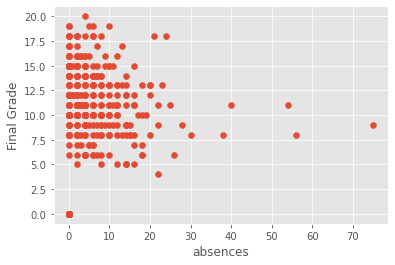

In [135]:
p = "absences"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()